In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
fits_file = "dwarfs/tess-s0012-3-3_169.234200_-80.464300_100x100_astrocut.fits"

In [3]:
c = tess_cpm.CPM(fits_file, remove_bad=True)

Removing 7 bad data points (out of 1289) using the TESS provided "QUALITY" array


In [4]:
c.set_poly_model(1, 4, 0.5)
c.set_target(50, 51)
c.set_exclusion(10)
c.set_predictor_pixels(256, 'cos_similarity')

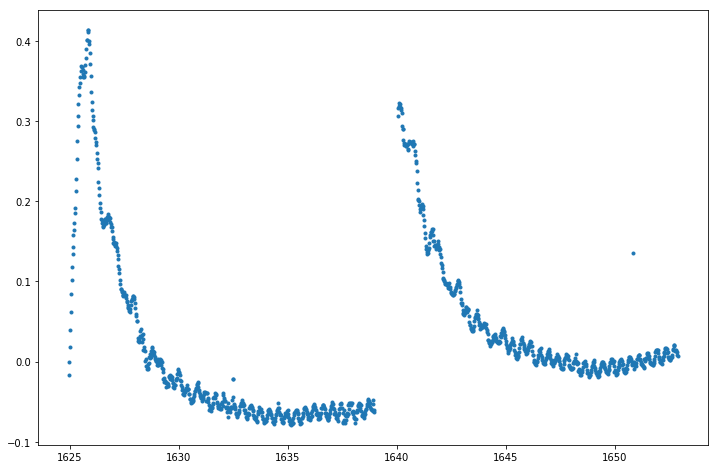

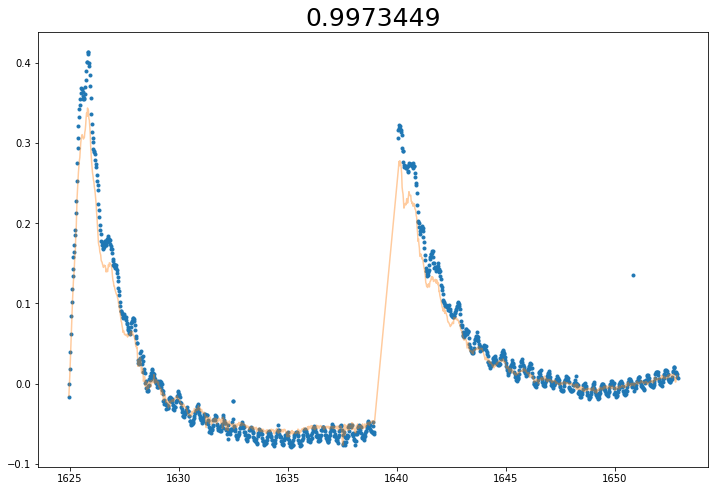

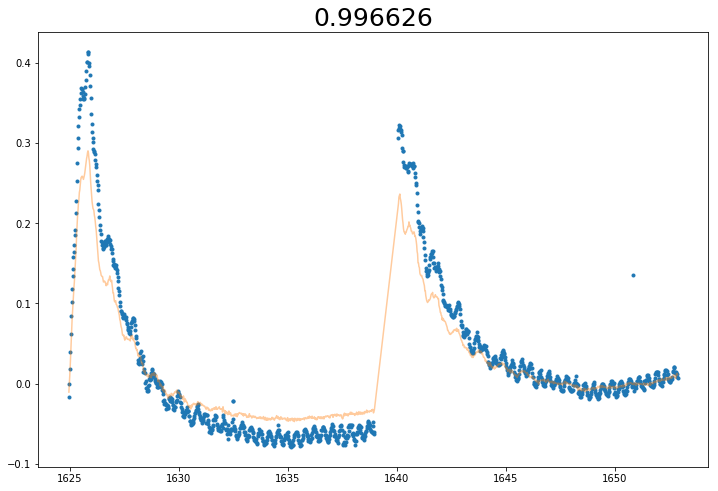

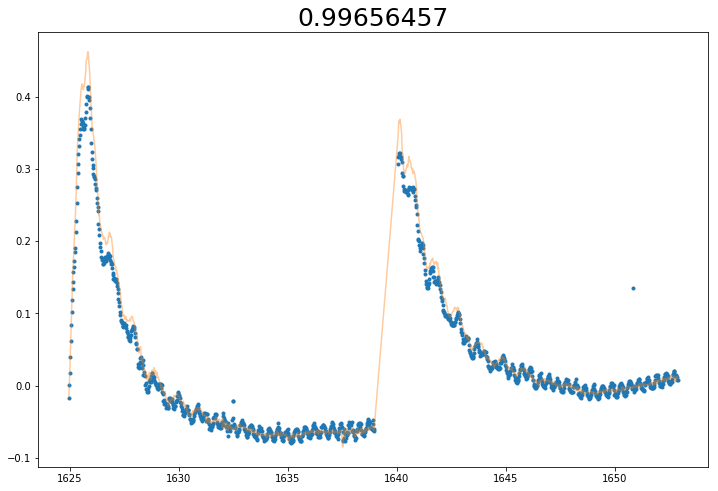

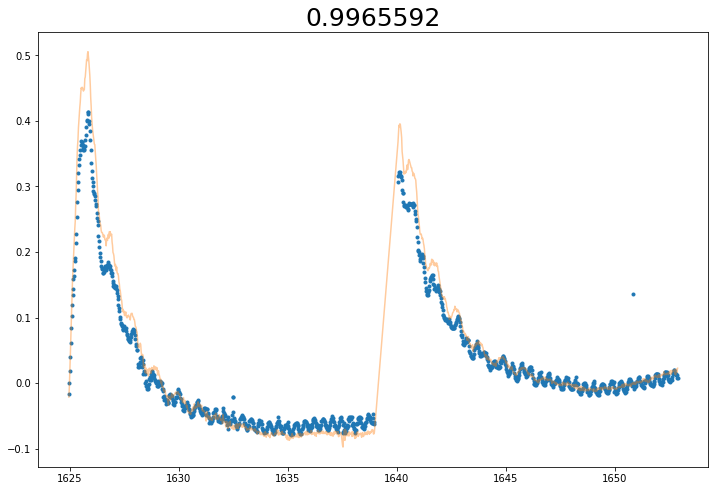

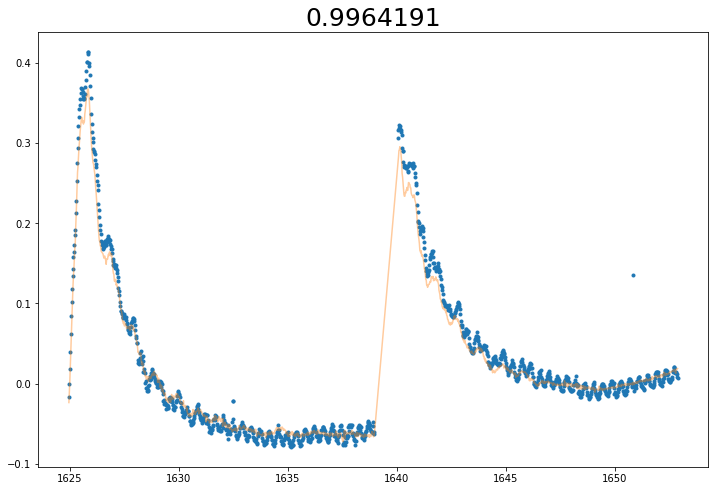

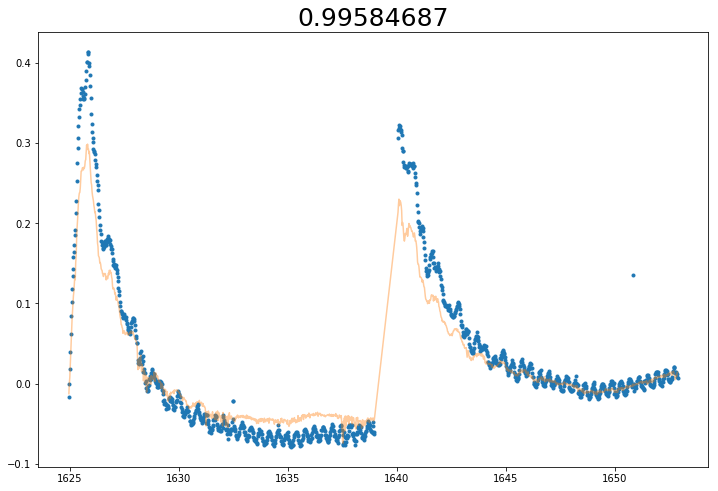

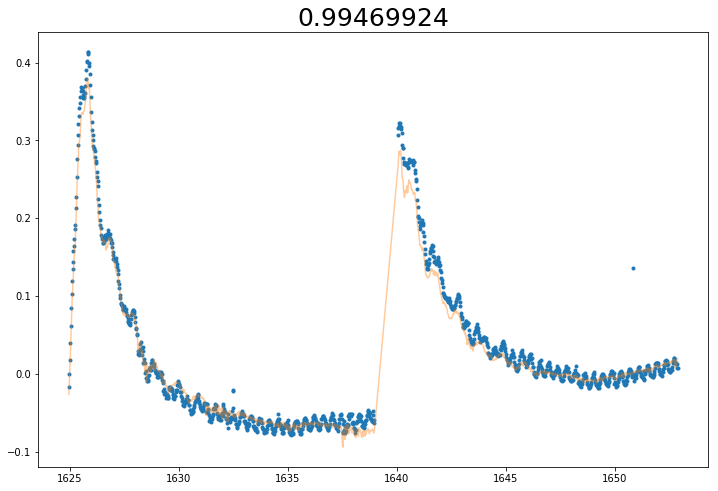

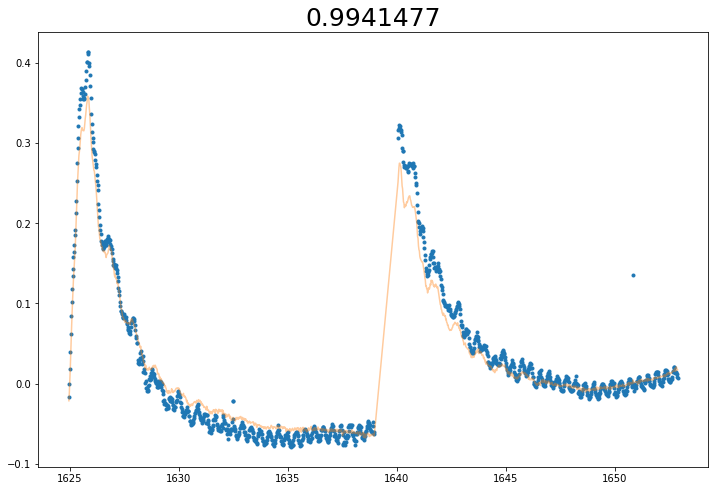

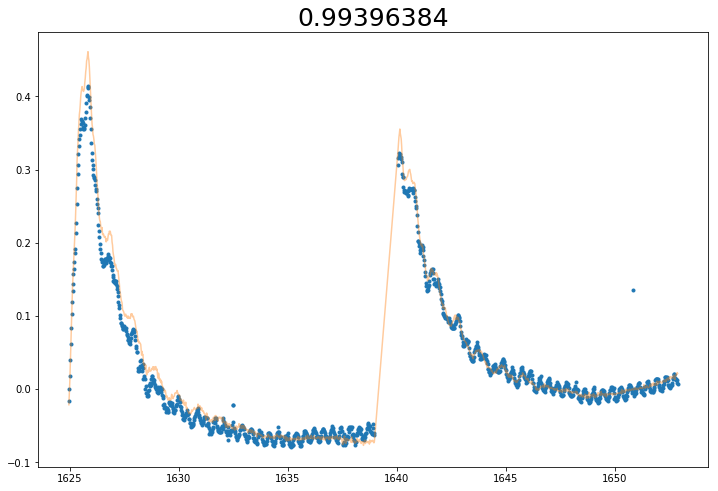

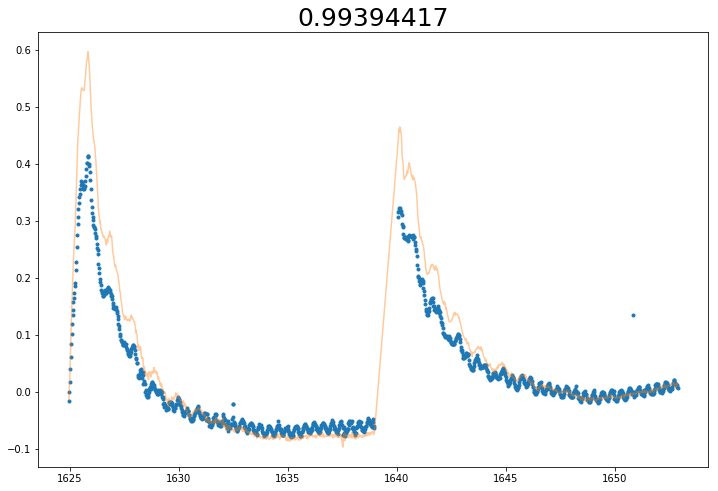

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(c.time, c.rescaled_target_fluxes, '.')
n = 10
# locs, mask = c.get_contributing_pixels(n)
# print(c.rescaled_predictor_pixels_fluxes.shape)
# print(locs[2])
# plt.plot(c.time, c.rescaled_im_fluxes[:, locs[0][0], locs[0][1]], '-')
# plt.plot(c.time, c.rescaled_predictor_pixels_fluxes[:, 4])
for i in range(n):
    plt.figure(figsize=(12, 8))
    t = c.rescaled_target_fluxes
    p = c.rescaled_predictor_pixels_fluxes[:, i]
    plt.plot(c.time, t, '.')
    plt.plot(c.time, p, '-', alpha=0.4)
    plt.title(np.dot(p, t)/(np.linalg.norm(p)*np.linalg.norm(t)), fontsize=25)
    plt.show()

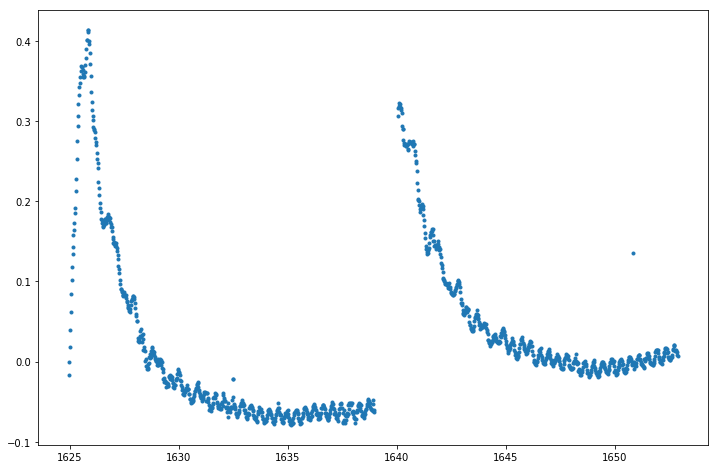

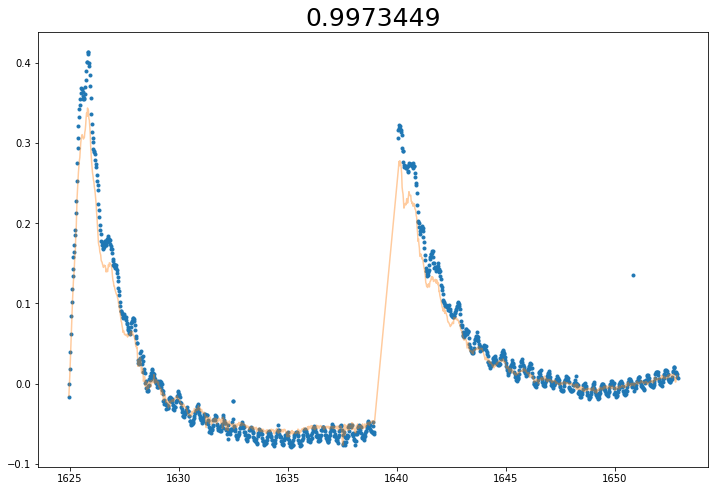

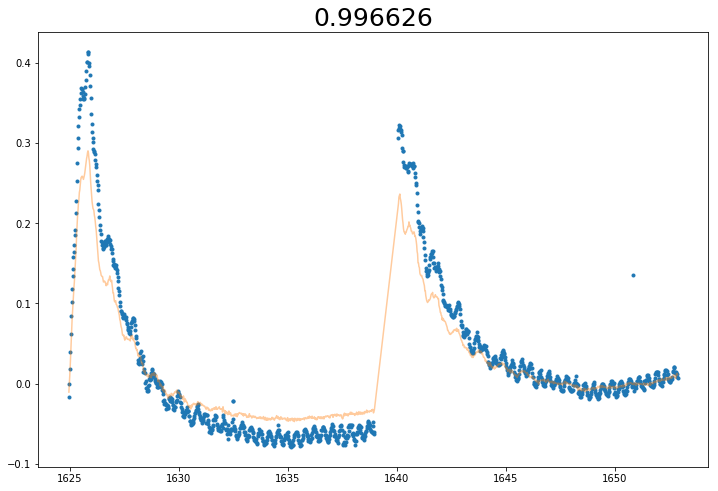

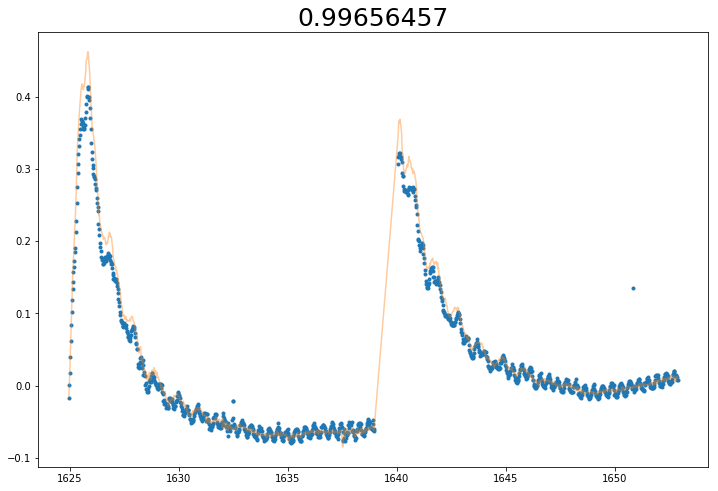

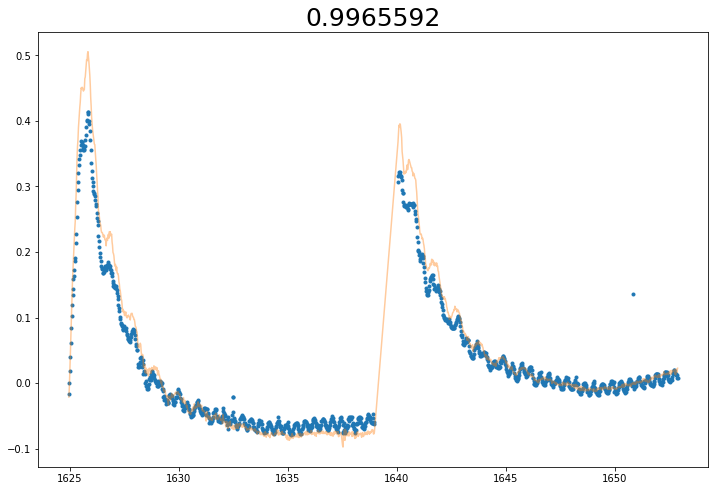

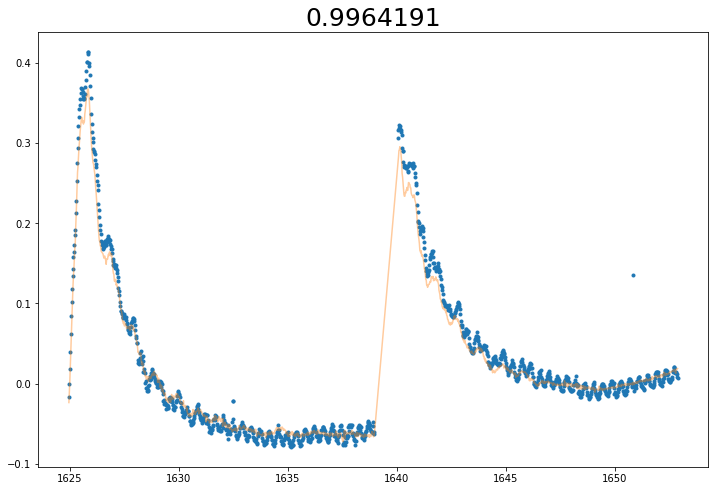

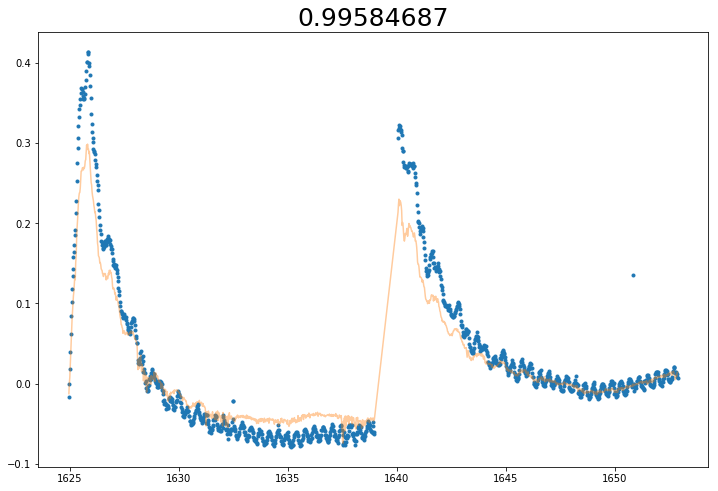

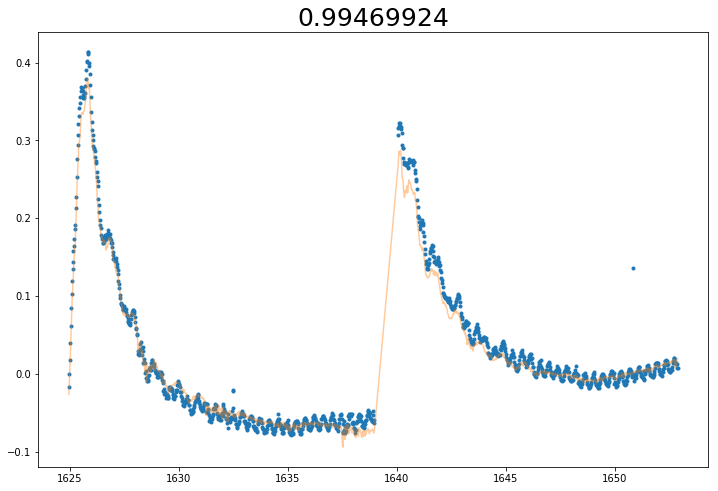

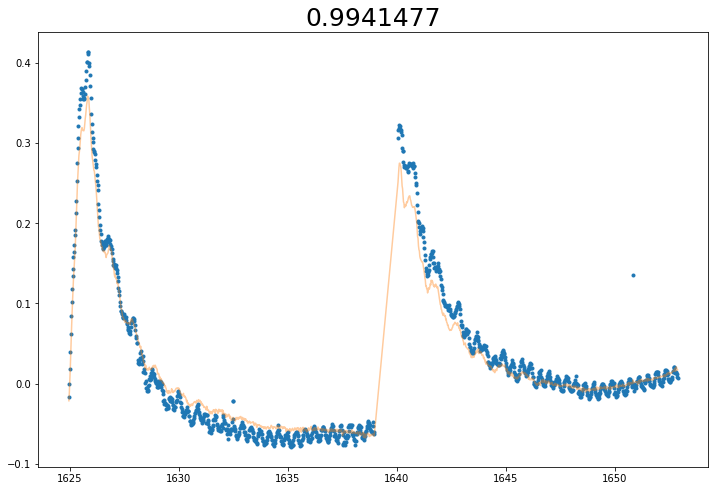

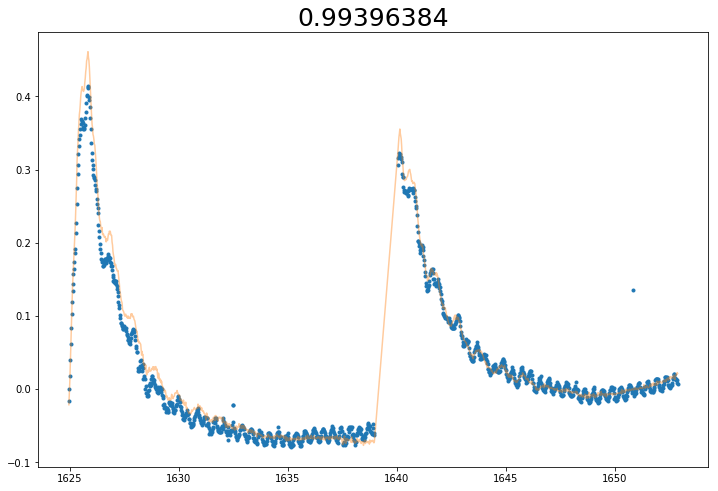

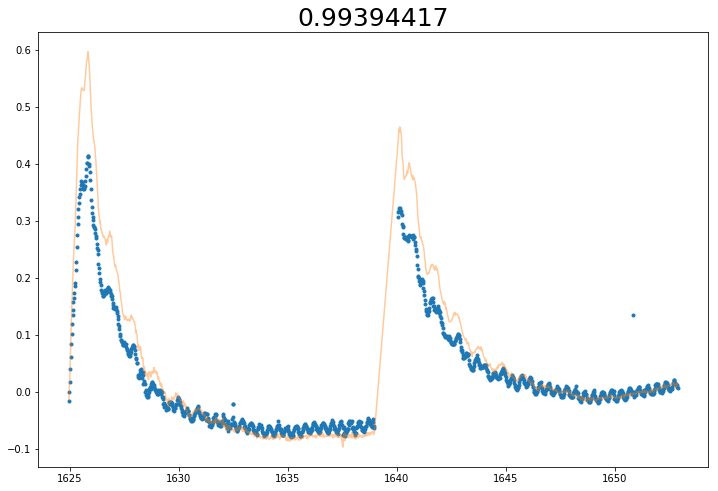

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(c.time, c.rescaled_target_fluxes, '.')
n = 10
# locs, mask = c.get_contributing_pixels(n)
# print(c.rescaled_predictor_pixels_fluxes.shape)
# print(locs[2])
# plt.plot(c.time, c.rescaled_im_fluxes[:, locs[0][0], locs[0][1]], '-')
# plt.plot(c.time, c.rescaled_predictor_pixels_fluxes[:, 4])
for i in range(n):
    plt.figure(figsize=(12, 8))
    t = c.rescaled_target_fluxes
    p = c.rescaled_predictor_pixels_fluxes[:, i]
    plt.plot(c.time, t, '.')
    plt.plot(c.time, p, '-', alpha=0.4)
    plt.title(np.dot(p, t)/(np.linalg.norm(p)*np.linalg.norm(t)), fontsize=25)
    plt.show()

In [5]:
c.lsq(0.5, rescale=True, polynomials=False)

AttributeError: 'float' object has no attribute 'np'

In [ ]:
tess_cpm.summary_plot(c, 100, subtract_polynomials=False, save=False)

In [ ]:
c.sigma_clip_process(sigma=3)
tess_cpm.summary_plot(c, 20, subtract_polynomials=True)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(c.time[c.valid], c.rescaled_target_fluxes[c.valid] - c.lsq_prediction[c.valid], ".-")

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(c.time, c.rescaled_target_fluxes, ".-", color="black", label="Data")
plt.legend();

In [ ]:
c.sigma_clip(3, 3)

In [ ]:
plt.figure(figsize=(15, 6))
orig_model = np.dot(c.orig_m, c.lsq_params)
# model = np.dot(c.m, c.lsq_params)
plt.plot(c.orig_time, (c.rescaled_target_fluxes - orig_model))
# plt.plot(c.time, c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model)
# plt.plot(c.orig_time, model)

In [ ]:
plt.figure(figsize=(15, 6))
orig_model = np.dot(c.orig_m, c.lsq_params)
# model = np.dot(c.m, c.lsq_params)
plt.plot(c.orig_time[~c.clipped], (c.rescaled_target_fluxes - orig_model)[~c.clipped])
# plt.plot(c.time, c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model)
# plt.plot(c.orig_time, model)

In [ ]:
a = c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col] - orig_model
b = c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model

In [ ]:
# # plt.plot(c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col][~c.clipped])
# plt.plot(c.rescaled_im_fluxes[:, c.target_row, c.target_col])
plt.plot(a[~c.clipped])
plt.plot(b)
np.allclose(a[~c.clipped], b)

In [ ]:
plt.plot(c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col][~c.clipped] - c.rescaled_im_fluxes[:, c.target_row, c.target_col])

In [ ]:
c.sigma_clip(3, 2)

In [ ]:
tess_cpm.summary_plot(c, 20, subtract_polynomials=True)

In [ ]:
plt.figure(figsize=(15, 6))
orig_model = np.dot(c.orig_m, c.lsq_params)
model = np.dot(c.m, c.lsq_params)
plt.plot(c.orig_time, c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col] - orig_model)
plt.plot(c.time, c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model)
# plt.plot(c.orig_time, model)

In [ ]:
fits_file = "dwarfs/tess-s0006-1-3_99.153900_6.321500_100x100_astrocut.fits"

In [ ]:
d = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
d.set_poly_model(1, 4, 2)
d.set_target(50, 50)
d.set_exclusion(10)
d.set_predictor_pixels(256)

In [ ]:
d.lsq(0.5, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(d, 20, subtract_polynomials=False)

In [ ]:
d.sigma_clip(3, 2)
tess_cpm.summary_plot(d, 20, subtract_polynomials=True)

In [ ]:
a = (np.zeros(100) == 1)

In [ ]:
a

In [ ]:
# The below is for the Luhman 16 target mentioned by Johanna. It seems like it's
# close to the edge of the cameras, making it somewhat tricky to handle.

In [ ]:
fits_file = "dwarfs/tess-s0010-2-1_162.328812_-53.319467_100x100_astrocut.fits"
# fits_file = "dwarfs/tess-s0010-3-2_162.328812_-53.319467_100x100_astrocut.fits"

In [ ]:
d = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
d.set_poly_model(1, 4, 0.5)
d.set_target(50, 50)
d.set_exclusion(10)
d.set_predictor_pixels(256)

In [ ]:
d.lsq(1., rescale=True, polynomials=False)

In [ ]:
tess_cpm.summary_plot(d, 20, subtract_polynomials=False, save=False)

In [ ]:
plt.imshow(d.im_fluxes[0,:,:], origin="lower")

In [ ]:
d.pixel_medians

In [ ]:
plt.imshow(d.pixel_medians, origin="lower", vmin=np.nanpercentile(d.pixel_medians, 10), vmax=np.nanpercentile(d.pixel_medians, 90))

In [ ]:
plt.plot(d.time, d.im_fluxes[:, 50, 50], ".-")

In [ ]:
d.im_fluxes[0, :, :]

In [ ]:
x = np.array([1, 2, 3, np.nan])

In [ ]:
x

In [ ]:
x.mean()

In [ ]:
np.median(x)